![Title](Images/cisco.png)

# Lab - Decision Tree Classification 

### Objectives
In this lab, you will use a decision tree classifier model to determine who survived the Titanic cruise ship disaster.
<li>**Part 1: Create a Decision Tree Classifier **</li>
<li>**Part 2: Apply the Decison Tree Model**</li>
<li>**Part 3: Evaluate the Decison Tree Model**</li>
### Scenario / Background
In this lab you will create a decision tree classifier that will work with a data set which contains the details about the more than 1300 hundred passengers who were onboard the passenger liner Titanic on its infamous maiden voyage. 
### Required Resources
* 1 PC with Internet access
* Python libraries: `pandas`, `sklearn`, and `IPython.display`
* Additonal application: Graphviz
* Datafiles: titanic-train.csv, titanic-test.csv, titanic_all.csv

## Part 1: Create a Decision Tree Classifier

In this part of the lab, you will create a decision tree classifier that will learn from a labelled dataset.


The dataset contains the names and demographic details for each passenger. In addition, details of the passengers' trip are included. From this data, we can be build a decision tree that illustrates the factors that contributed to survivability, or lack of it, for the voyage.

The datasets contain the following variables:

<table style="undefined;table-layout: fixed; width: 953px">
<colgroup>
<col style="width: 194.2px">
<col style="width: 759.2px">
</colgroup>
  <tr>
    <th>Variable</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1. PassengerID</td>
    <td>Unique identifier for each passenger</td>
  </tr>
  <tr>
    <td>2. Survival</td>
    <td>Did the passenger survive? (0 = No; 1 = Yes)</td>
  </tr>
  <tr>
    <td>3. Pclass</td>
    <td>Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)</td>
  </tr>
  <tr>
    <td>4. Name</td>
    <td>Name of the passenger. (last name, first name)</td>
  </tr>
  <tr>
    <td>5. Gender</td>
    <td>Male or female</td>
  </tr>
  <tr>
    <td>6. Age</td>
    <td>Age in years. Mostly integers with float values for children under one year.</td>
  </tr>
  <tr>
    <td>7. SibSp</td>
    <td>Number of siblings or spouse onboard.</td>
  </tr>
  <tr>
    <td>8. Parch</td>
    <td>Number of parents or children onboard.</td>
  </tr>
  <tr>
    <td>9. Ticket</td>
    <td>Ticket number</td>
  </tr>
  <tr>
    <td>10. Fare</td>
    <td>Amount paid for fare in pre-1970 British Pounds</td>
  </tr>
  <tr>
    <td>11. Cabin</td>
    <td>Cabin number</td>
  </tr>
  <tr>
    <td>12. Embarked</td>
    <td>Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</td>
  </tr>
</table>


With the data above, what kinds of questions can we ask about the factors that contributed to passengers surviving or perishing in the Titanic disaster?<br><br>




The only question we can ask is the survival of the pasenger.

#### Step 1: Create the dataframe
##### a) Import  pandas and the csv file
First, import `pandas` and create a dataframe from the Titanic training data set, which is stored in the titanic-train.csv file. Use the `pd.read_csv() method`.

In [1]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

##### b) Verify the import and take a look at the data.

In [2]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 67.9+ KB


Are there missing values in the data set?


Yes, there are missing values.

In [3]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


#### Step 2: Prepare the Data for the Decision Tree Model.

##### a) Replace string data with numeric labels
We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be used to represent "male" and 1 will represent "female."

In this code, a lambda expression is used with the `apply()` dataframe method. This lambda expression represents a function that uses a conditional statement to replace the text values in the columns with the appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male', return 0, if the value is something else, return 1." The `apply()` method will execute this function on the values in every row of the "Gender" column of the dataframe.

In [4]:
#code cell 4
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### b) Verify that the Gender variable has been changed. 
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [5]:
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


##### c) Address Missing Values in the Dataset
The output of the info() method above indicated that about 180 observations are missing the age value. The age value is important to our analysis. We must address these missing values in some way. While not ideal, we can replace these missing age values with the mean of the ages for the entire dataset.

This is done by using the `fillna()` method on the "Age" column in the dataset. The `fillna()` method will change the original dataframe by using the `inplace = True` argument.

In [6]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

##### d) Verify that the values have been replaced.


In [7]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


What is the value that was used to replace the missing ages?


In [ ]:
We replaced the missing values by the mean value of the ages of the entire dataset.

#### Step 3: Train and Score the Decision Tree Model.

##### a) Create an array object with the variable that will be the target for the model. 
The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors and victims. The model will learn which input variable values are most likely to belong to victims and survivors, and then use that information to classify passengers from a unique test data set.

In [12]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

##### b) Create an array of the values that will be the input for the model. 
Only some of the features of the data are useful for creating the classifier tree. We create a list of the columns from the data that we want the classifier to use as the input variables and then create an array using the column name from that variable. The variable `X_input` holds the values for all the features that the model will use to learn how to make the classifications. After the model is trained, we will use this variable to assign these labels to the test data set.

In [13]:
#code cell 9
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

##### c) Create the learned model.
Import the decision tree module from the `sklearn` machine learning library. Create the classifier object ```clf_train```. Then, use the ```fit()``` method of the classifier object, with the X_input and y_target variables as parameters, to train the model.

In [14]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

##### d) Evaluate the model 
Use the ```score()``` method of the decision tree object to display the percentage accuracy of the assignments made by the classifier. It takes the input and target variables as arguments.

In [15]:
#code cell 11
clf_train.score(X_input,y_target)

0.81639344262295077

This score value indicates that classifications made by the model should be correct approximately 82% of the time.

#### Step 6: Visualize the Tree 
##### a) Create the intermediate file output
Import the `sklearn.externals.six StringIO` module which is used to output the characteristics of the decision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifier into a format that can be converted into a graphic.

In [17]:
#code cell 12
from sklearn.externals.six import StringIO
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

##### b) Install Graphviz
To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that a prompt be answered, which can't be done from a notebook code cell. Use the ```apt-get install graphviz``` command from the terminal command line to install this software.

##### c) Convert the intermediate file to a graphic
The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shell command, so use ```!``` before it to run it from this noteblook. The new titanic.png graphic file should appear in the directory that contains this notebook.

In [18]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png

##### d) Display the image 
Now we will import the `Image` module from the `IPython.display` library. This will allow us to open and display an external graphics file on the notebook page. The `Image` function is used to display the file, with the .png file name as argument.

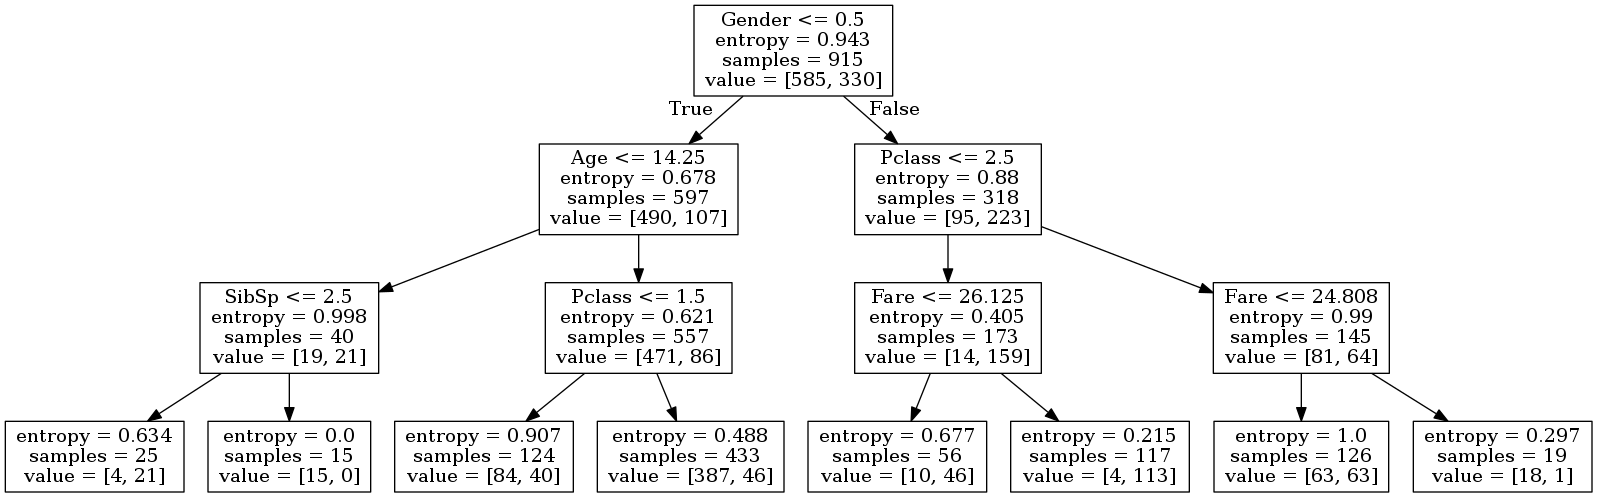

In [19]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("./Data/titanic.png")

##### e) Interpret the tree
From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it is the single most important factor in making the classification. The branches to the left are for Gender = 0 or male. Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fit the critierion at that point in the tree. For example, the root node indicates that there are 891 observations that make up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. In the third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686. Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of 13.5, and the other 400 were older than that age.

Finally, the elements in the value array indicate survival. The first value is the number of people who died, and the second is the number of survivors for each criterion. The root node tells us that out of our sample, 549 people died and 342 survived. 

Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes in which the decision results in equal values in the survival value array, the entropy is at its highest possible value, which is 1.0. This means that  the model was unable to definitively make the classification decision based on the input variables. For values of very low entropy, the decision was much more clear cut, and the difference in the number of survivors and victims is much higher.

What describes the group that had the most deaths by number? Which group had the most survivors?



*Type your answers here*

## Part 2: Apply the Decision Tree Model

In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset of Titanic passengers. The decision tree will evaluate the features of each observation and label the observation as survived (label = 1) or died (label = 0).

#### Step 1: Import and Prepare the Data
In this step, you will import and prepare the data for analysis. 

##### a) Import the data. 
Name the dataframe "testing" and import the file titanic-test.csv. 

In [103]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("./Data/titanic-test.csv")
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S


How many records are in the data set?<br/>



there is 12records in this dataset.

Which important variables(s) are missing values and how many are missing?


The age and the cabin columns have the most missing values.

##### b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for female..

In [104]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


##### c) Replace the missing age values with the mean of the ages.

In [105]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)


##### d) Verify that the values have been replaced.
Check that the missing values have been filled and that the Gender labels are 0 and 1.

In [106]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head 
#methods from here, by entering and running one and then the other.
testing.info()
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
PassengerId    393 non-null int64
Survived       393 non-null int64
Pclass         393 non-null int64
Name           393 non-null object
Gender         393 non-null int64
Age            393 non-null float64
SibSp          393 non-null int64
Parch          393 non-null int64
Ticket         393 non-null object
Fare           393 non-null float64
Cabin          93 non-null object
Embarked       392 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 30.7+ KB


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


#### Step 2: Label the testing dataset
In this step, you will apply the learned model to the testing dataset.

##### a) Create the array of input variables from the testing data set.


In [107]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

##### b) Apply the model to the testing data set.
Use the ```predict()``` method of the ```clf_train``` object that was trained to label the observations in the testing data set with the most likely survival classification. Provide the array of input variables from the testing data set as the parameter for this method.

In [109]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
testing.head()

ValueError: Unknown label type: 'continuous-multioutput'

##### c) Evaluate the accuracy of the estimated labels
The ground truth for the survival of each passenger can be found in another file called `all_data.csv`.
To select only the passengers contained in the testing dataset, we merge the `target_labels` dataframe and the `all_data` dataframe on the field `Name`. We then compare the estimated label with the ground truth dataframe and compute the accuracy of the learned model.

In [85]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("./Data/titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
# Print the result


NameError: name 'target_labels' is not defined

## Part 3: Evaluate the Decision Tree Model

The ```sklearn``` library includes a module that can be used to evaluate the accurracy of the decision tree model. The ```train_test_split()``` method will divide the observations in whole data set into two randomly selected arrays of observations that makeup the testing and training datasets. After fitting the model to the training data, the trained model can be scored and the prediction accurracy compared for both the training and test datasets. 
It is desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for the training data set. 

##### Step 1: Import the data
This time we will import the data from a `csv` file, but we will specify the columns that we want to have appear in the dataframe. We will do this by passing an array-like list of column names to the `read_csv()` method `usecols` parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be in quotes and the list should be square brackets. Name this dataframe `all_data`.

In [43]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
Survived    1308 non-null int64
Pclass      1308 non-null int64
Gender      1308 non-null object
Age         1045 non-null float64
SibSp       1308 non-null int64
Fare        1308 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.2+ KB


How many records are in the data set?<br/>




*Type your answers here*

Which important variables(s) are missing values and how many are missing?



*Type your answers here*

#### Step 2: Prepare the data.
##### a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [86]:
#code cell 23
#Label the gender variable with 0 and 1
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

##### c) Replace the missing age values with the mean of the age of all members of the data set. 

In [87]:
#code cell 24
#replace missing Age values with the mean age
training["Age"].fillna(training["Age"].mean(), inplace=True)
#display the first few rows of the data set
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",1,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",1,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",1,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


#### Step 2: Create the input and output variables for the training and testing data. 
The `sklearn` library includes modules that help with model selection. We will import from `sklearn.model_selection` the `train_test_split()` method. This method will automatically split the entire dataset,  returning in total four numpy arrays, two for the features (test and validation) and two for the labels (test and validation). One parameter of the method specifies the proportion of observations to use for testing and training. Another parameter specifies a seed value that will be used to randomize assignment of the observation to testing or training. This is used so that another user can replicate your work by receiving the same assignments of observations to datasets. The syntax of the method is:

<center>```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```</center>

40% of the data will be used for testing. The random seed is set to 0.


The method returns four values. These values are the input varibles for training and testing data and the target variables for the training and testing data in that order.
 ##### a) Designate the input variables and output variables and generate the arrays.

In [89]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.cross_validation import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

##### b) Train the model and fit it to the testing data.
Now the model can be fit again. The model will be trained using only the training datat, as selected by the `train_test_split` function.

In [90]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)


ValueError: could not convert string to float: 'female'

##### c) Compare models by scoring each.
Use the score() method of each decision tree object to generate scores.

In [55]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

We have now compared the scores for the trained model on both test and validation data. As expected, the test accuracy score is close, but lower than the score for the training data. This is because normally, the model tends to overfit the training data, therefore the test score is a better evaluation of how the model is able to generalize outside of the training data.

## Part 4 For Further Study (optional)
If you have the time and are interested, you could try the following and see how the decision tree is affected.

#### 1. Remove observations with missing Age values.
Using a mean to replace missing age values may affect the accuracy of the model. One approach to this might be to remove all observations with missing age values. Although this will decrease the size of the training dataset, it could improve accuracy.

#### 2. Remove the input variables.
Another issue with this type of analysis is the identification of which input variables, or features, are essential to the accuracy of the classifier. One way to do this is to try running the classifier with different sets of input variables by editing the list of variables that is used to fit the model. 

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>
